In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [2]:
xs = np.array([1,2,3,4,5], dtype= np.float64)
ys = np.array([5,4,6,5,6], dtype= np.float64)

# Training
# Finding the best fit line - slope and y-intercept

In [3]:
def best_fit_slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
         ((mean(xs) **2 ) - mean((xs) * (xs))))
    
    b = mean(ys) - m * mean(xs)
    
    return m, b

# Testing
## Finding the r2 error:

In [4]:
def squared_error(y_original, y_line):
    return sum((y_original - y_line)**2)

def squared_error_mean(y_original):
    mean_val = mean(y_original)
    return sum([(y-mean_val)**2 for y in y_original])

def coeff_of_determination(y_orig, y_line):
    return 1 - (squared_error(y_orig, y_line) / squared_error_mean(y_orig))

In [5]:
def create_dataset(hm, variance, step = 2, correlation='pos'):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation == 'pos':
            val += step
        elif correlation == 'neg':
            val -= step
    xs = [x for x in range(hm)]
    return np.array(ys, dtype = np.float64), np.array(xs, dtype=np.float64)

In [6]:
ys, xs = create_dataset(40, 40, 2, 'neg')

In [7]:
m, b = best_fit_slope(xs, ys)
print(m, b)

-2.753377110694184 12.965853658536588


In [8]:
predicted_x = 15
predicted_y = predicted_x*m +b
print(predicted_x, predicted_y)

15 -28.334803001876175


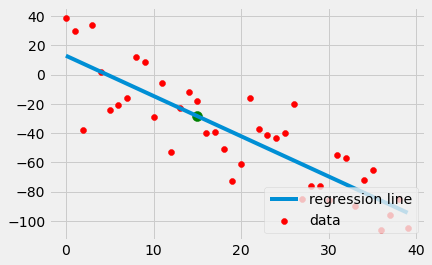

In [9]:
regression_line = [m*x +b for x in xs]
plt.scatter(xs, ys, color = 'red', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.scatter(predicted_x, predicted_y, s= 100, color = 'green')
plt.legend(loc = 4)
plt.show()

In [10]:
r_squared = coeff_of_determination(ys, regression_line)
r_squared

0.7287142291406352